# Load Data and Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('data_fs.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [3]:
df = df.iloc[:, 1:]
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


# Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Check Null Value

In [5]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [6]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [7]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

# Replace Missing Value with Mode of its feature

In [8]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [9]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

# Descriptive Statistic

In [10]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [11]:
df.describe(include='object')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,1000,1000,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,786,668,337


In [12]:
df.to_csv('DataForViz.csv',index=False)

# Boxplot

In [13]:
data_col_numeric = df.select_dtypes(include=['int64']).columns.tolist()
data_col_numeric

['Age', 'Job', 'Credit amount', 'Duration']

In [14]:
def boxplot_numerical(numerical):
    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical]).set_title(numerical)
    median = df[numerical].median()
    FirstQuartile = df[numerical].quantile(0.25)
    ThirdQuartile = df[numerical].quantile(0.75)
    Interquartile = scipy.stats.iqr(df[numerical])
    UpperFence = ThirdQuartile + (1.5*Interquartile)
    LowerFence = FirstQuartile - (1.5*Interquartile)

    print ('==================================')
    print ('Statistical Data Summary')
    print ('==================================')
    print ('Median : ', median)
    print ('1st Quartile : ', FirstQuartile)
    print ('3rd Quartile : ', ThirdQuartile)
    print ('IQR : ', Interquartile)
    print ('Upper Fence : ', UpperFence)
    print ('Lower Fence : ', LowerFence)
    print ('==================================')

    UpperOutliers = []
    LowerOutliers = []
    StatusUpperOutliers = False
    StatusLowerOutliers = False
    for x in df[numerical]:
      if (x > UpperFence):
        UpperOutliers.append(x)
        StatusUpperOutliers = True
      elif (x < LowerFence):
        LowerOutliers.append(x)
        StatusLowerOutliers = True
    print ()
    print ('==================================')
    print ('Outliers Data Detection')
    print ('==================================')
    print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
    print ('Upper Outliers Status : ', StatusUpperOutliers)
    print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
    print ('Lower Outliers Status : ', StatusLowerOutliers)

    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical], showfliers = False).set_title(numerical + ' No Outliers')

## Age

Statistical Data Summary
Median :  33.0
1st Quartile :  27.0
3rd Quartile :  42.0
IQR :  15.0
Upper Fence :  64.5
Lower Fence :  4.5

Outliers Data Detection
Upper Outliers Data :  [65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 67, 67, 67, 68, 68, 68, 70, 74, 74, 74, 74, 75, 75]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\Users\Ghaza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ghaza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


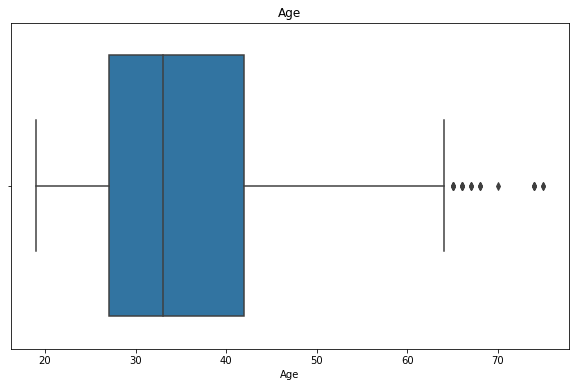

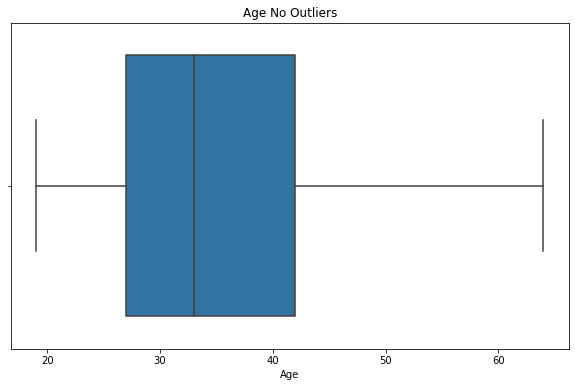

In [15]:
boxplot_numerical(data_col_numeric[0])

## Credit amount

Statistical Data Summary
Median :  2319.5
1st Quartile :  1365.5
3rd Quartile :  3972.25
IQR :  2606.75
Upper Fence :  7882.375
Lower Fence :  -2544.625

Outliers Data Detection
Upper Outliers Data :  [7966, 7980, 8065, 8072, 8086, 8133, 8229, 8318, 8335, 8358, 8386, 8471, 8487, 8588, 8613, 8648, 8858, 8947, 8978, 9034, 9055, 9157, 9271, 9277, 9283, 9398, 9436, 9566, 9572, 9629, 9857, 9960, 10127, 10144, 10222, 10297, 10366, 10477, 10623, 10722, 10875, 10961, 10974, 11054, 11328, 11560, 11590, 11760, 11816, 11938, 11998, 12169, 12204, 12389, 12579, 12612, 12680, 12749, 12976, 13756, 14027, 14179, 14318, 14421, 14555, 14782, 14896, 15653, 15672, 15857, 15945, 18424]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\Users\Ghaza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ghaza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


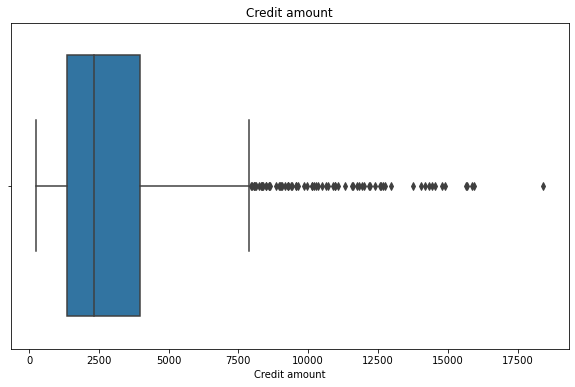

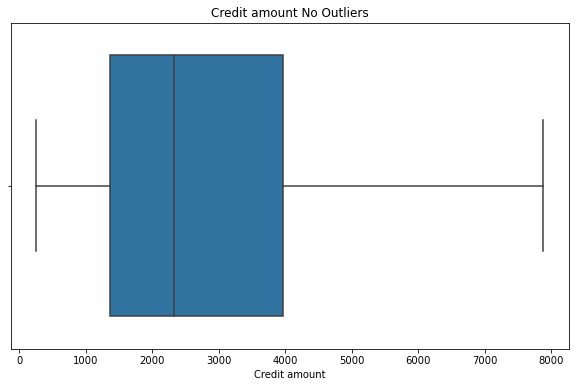

In [16]:
boxplot_numerical(data_col_numeric[2])

## Duration

Statistical Data Summary
Median :  18.0
1st Quartile :  12.0
3rd Quartile :  24.0
IQR :  12.0
Upper Fence :  42.0
Lower Fence :  -6.0

Outliers Data Detection
Upper Outliers Data :  [45, 45, 45, 45, 45, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 54, 54, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 72]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\Users\Ghaza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ghaza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


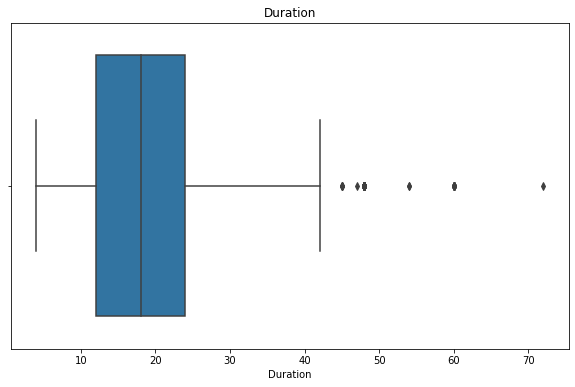

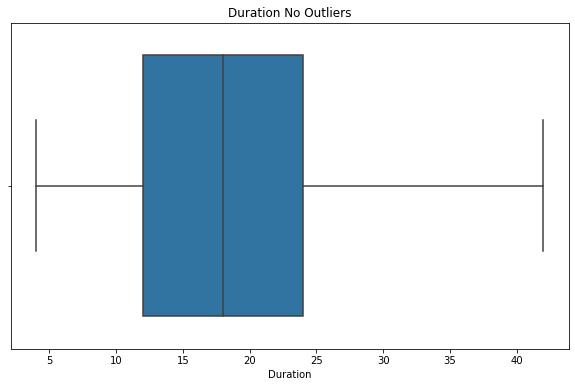

In [17]:
boxplot_numerical(data_col_numeric[3])

## Job

I don't figure out the outliers data in Job feature. Because data in Job feature is Ordinal data which define level of a person in Job skills. These are data description of data in Job feature : 
- Label 0 = Unskilled and Non-Resident
- Label 1 = Unskilled and Resident
- Label 2 = Skilled
- Label 3 = Highly Skilled

# Label Encoding

In [18]:
df['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [19]:
df['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [20]:
df['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [21]:
df['Checking account'].value_counts()

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64

In [22]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [28]:
df['Purpose'].value_counts()

1    337
5    280
4    181
0     97
3     59
6     22
2     12
7     12
Name: Purpose, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Sex = le.fit_transform(df.Sex)
df.Housing = le.fit_transform(df.Housing)
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])
df.Purpose = le.fit_transform(df.Purpose)

In [24]:
df['Sex'].value_counts()

1    690
0    310
Name: Sex, dtype: int64

In [25]:
df['Housing'].value_counts()

1    713
2    179
0    108
Name: Housing, dtype: int64

In [26]:
df['Saving accounts'].value_counts()

0    786
1    103
2     63
3     48
Name: Saving accounts, dtype: int64

In [27]:
df['Checking account'].value_counts()

0    668
1    269
2     63
Name: Checking account, dtype: int64

# Correlation Heatmap

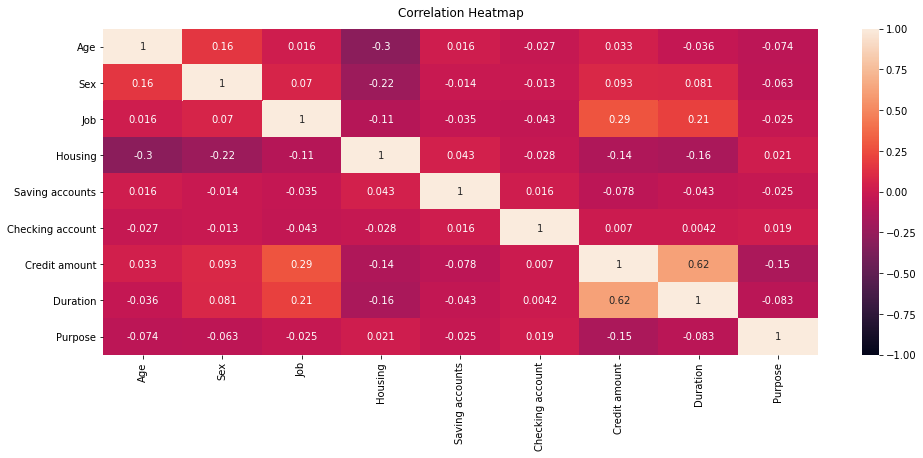

In [29]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Data Distribution

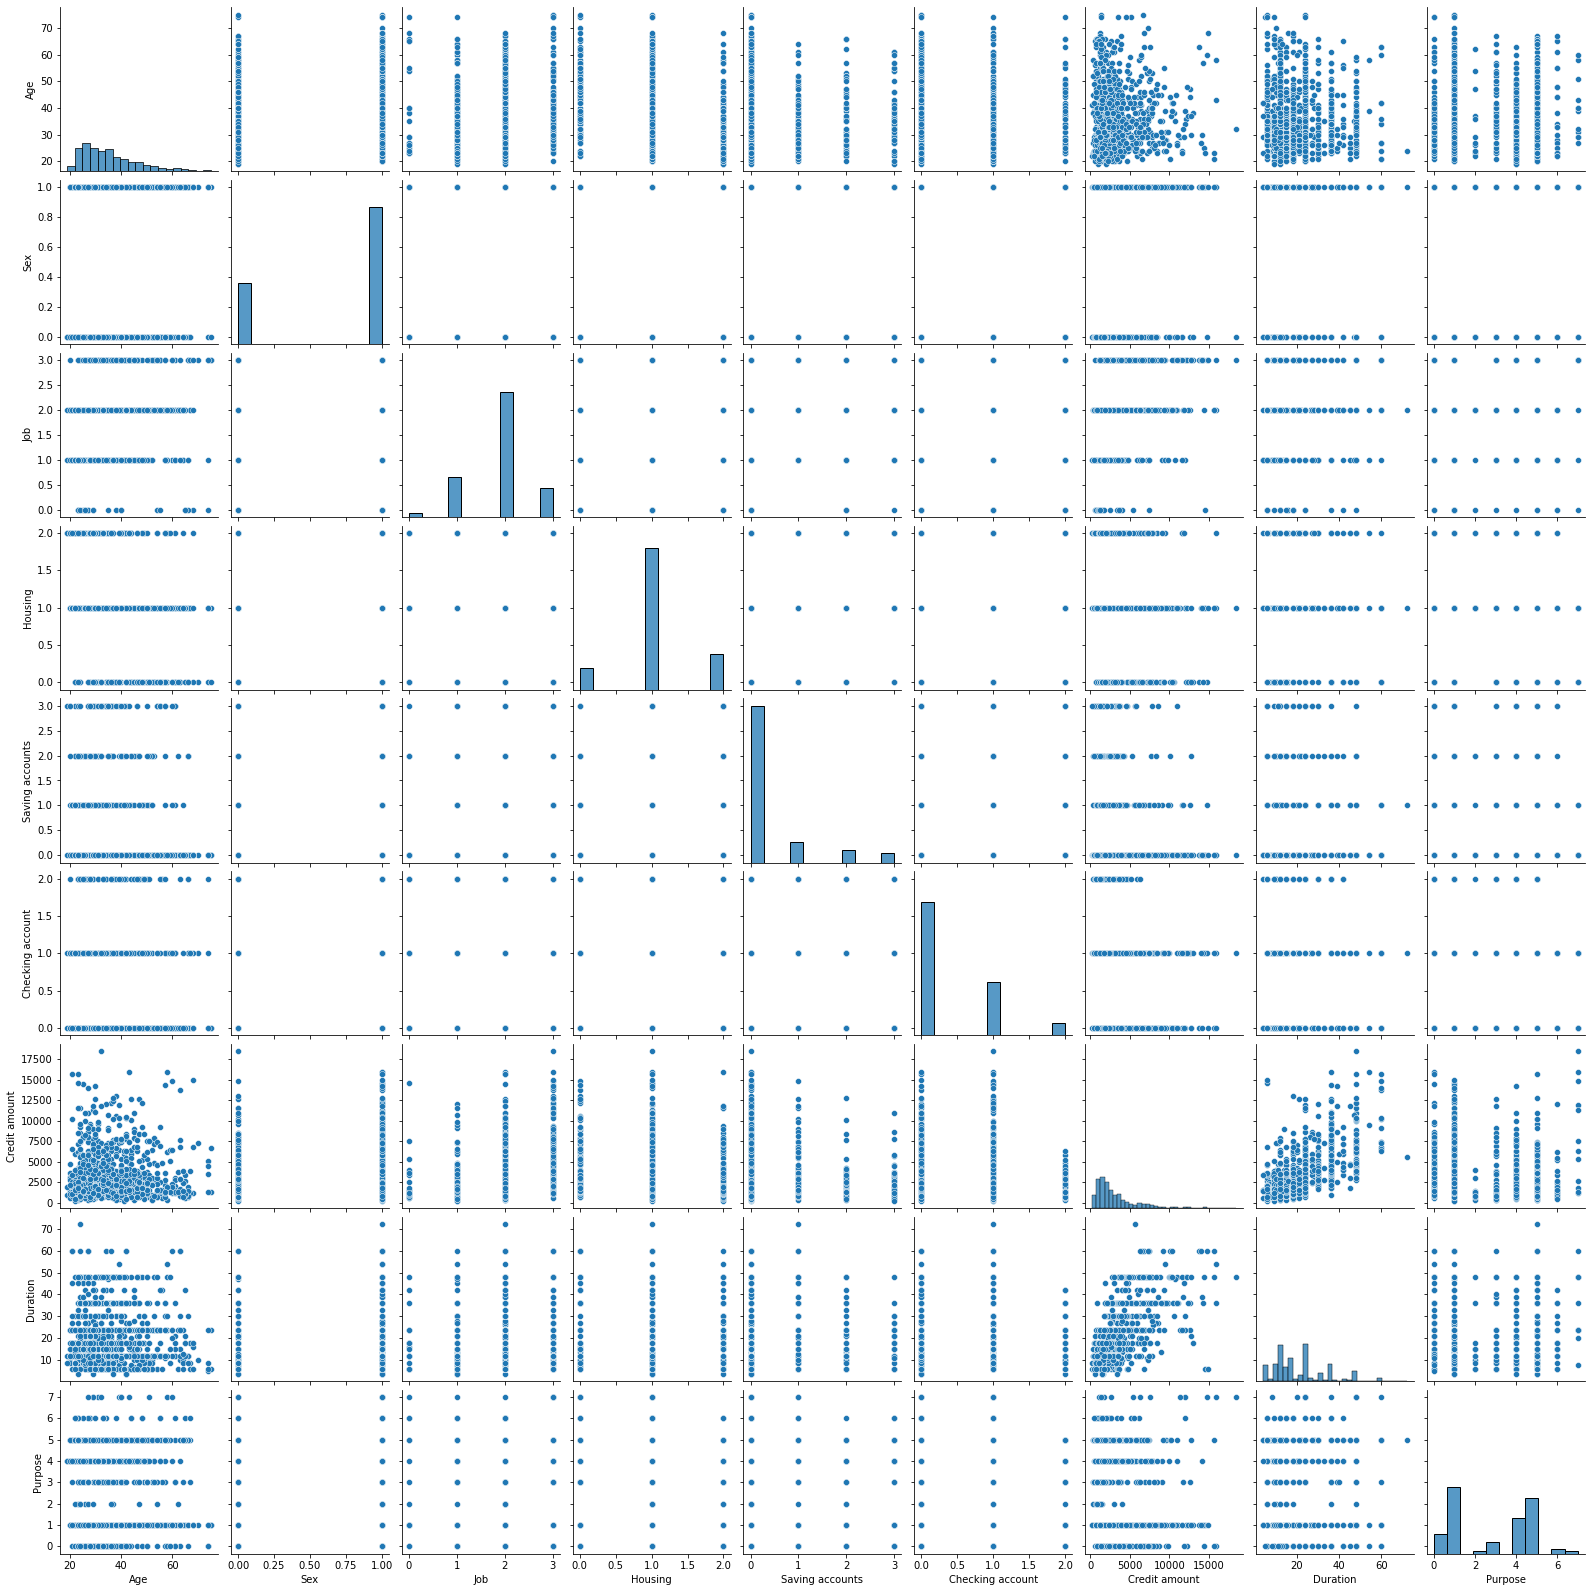

In [31]:
sns.pairplot(df)

# Hypothesis Testing

## Hypothesis 1

- Null Hypothesis : Average of Credit Amount of Male and Female is SAME
- Alternate Hypothesis : Average of Credit Amount of Male and Female is NOT SAME

In [36]:
dfMale = df[df['Sex']==1]
dfMale = dfMale.reset_index(drop=True)
dfMale_CreditAmount = dfMale[['Credit amount']]
dfMale_CreditAmount

,Credit amount
0,1169
1,2096
2,7882
3,4870
4,9055
...,...
685,2390
686,3857
687,804
688,1845


In [37]:
dfFemale = df[df['Sex']==0]
dfFemale = dfFemale.reset_index(drop=True)
dfFemale_CreditAmount = dfFemale[['Credit amount']]
dfFemale_CreditAmount

,Credit amount
0,5951
1,1295
2,4308
3,1567
4,1403
...,...
305,753
306,2923
307,1433
308,1409


In [38]:
from scipy import stats

stats.ttest_ind(dfMale_CreditAmount, dfFemale_CreditAmount)

Ttest_indResult(statistic=array([2.96620579]), pvalue=array([0.00308681]))

Based on result in above, pvalue is less than 0.05 *(0.003 < 0.05)* . So that, we can reject Null Hypothesis and Accept Alternate Hypothesis. It means that Average of Credit Amount of Male and Female is not same. Also, based on Statistic Value, it indicates that Average of Credit Amount of Male is higher than Female because we got positive Statistic Value, i.e. 2.96

## Hypothesis 2

- Null Hypothesis : Age of All Customer who propose credit loan for buying Car is 30
- Alternate Hypothesis : Age of All Customer who propose credit loan for buying Car is NOT 30

In [44]:
dfCustomerPurpose_Car = df[df['Purpose']==1]
dfCustomerPurpose_Car = dfCustomerPurpose_Car.reset_index(drop=True)
dfAge_CustomerPurpose_Car = dfCustomerPurpose_Car[['Age']]
dfAge_CustomerPurpose_Car

,Age
0,53
1,35
2,28
3,25
4,60
...,...
332,26
333,29
334,50
335,40


In [46]:
stats.ttest_1samp(dfAge_CustomerPurpose_Car, 30)

Ttest_1sampResult(statistic=array([11.25009647]), pvalue=array([3.91341283e-25]))

Based on result in above, pvalue is less than 0.05 *(3.91341283e-25 < 0.05)*. So that, we can reject Null Hypothesis and Accept Alternate Hypothesis. It means that Age of All Customer who propose credit loan for buying Car is NOT 30 years old. Also, based on Statistic Value, it indicates that Age of All Customer who propose credit loan for buying Car is more than 30 years old because we got positive Statistic Value, i.e. 11.25

# Dashboard of Data Visualization

## Credit Analysis Visualization Dashboard of DataOri

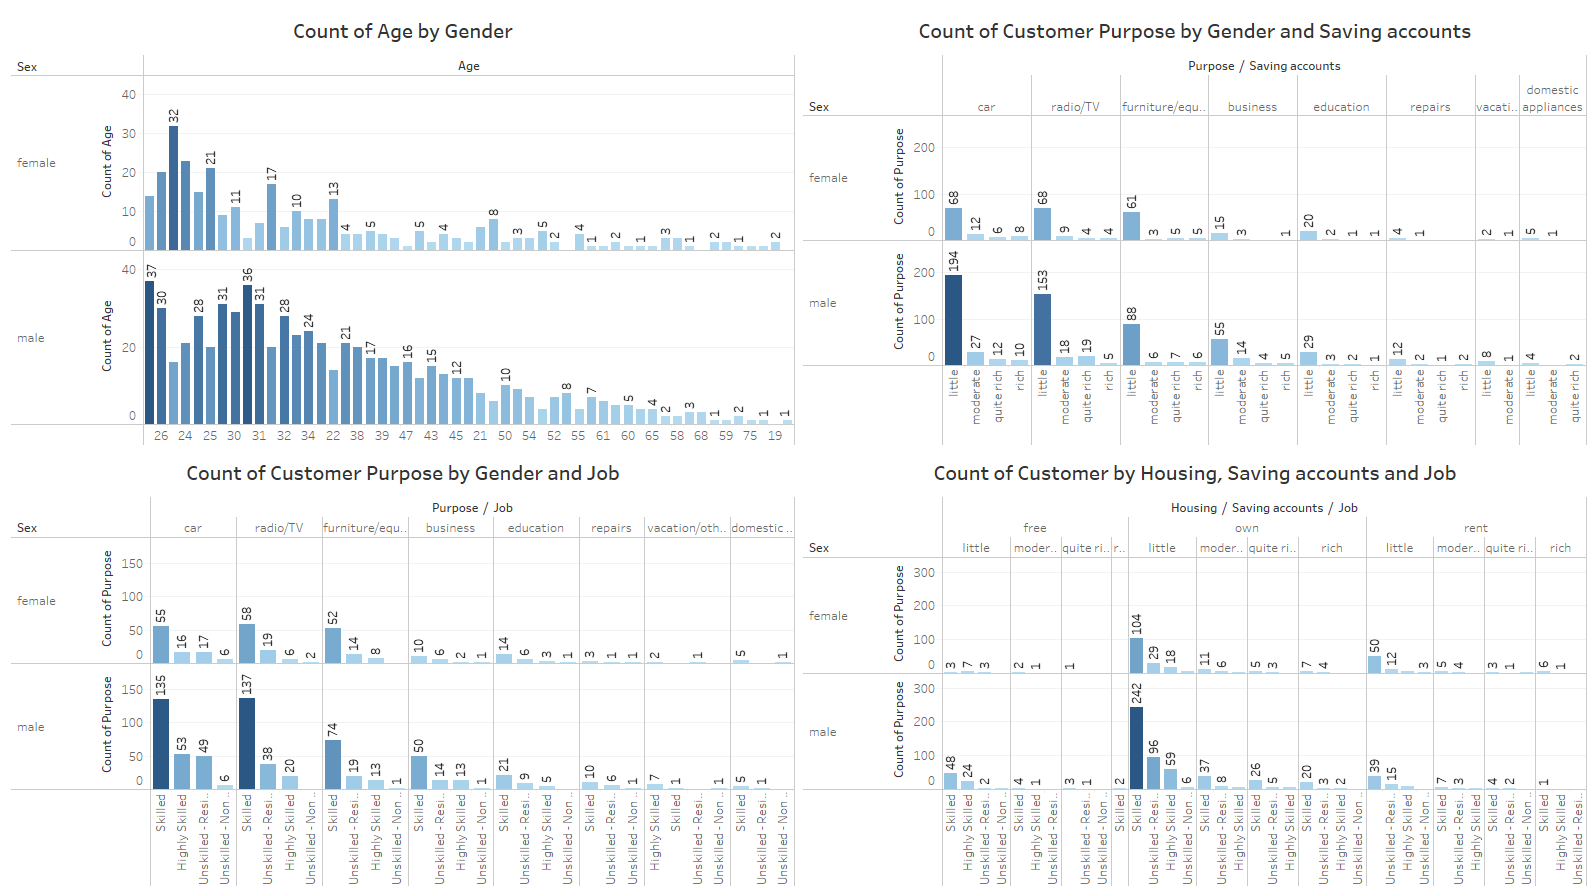

### Insight

1. Most of Male Customer is 27 years old with 37 people in total and most of Female Customer is 23 years old with 32 people in total.
2. The most of customer for every purpose has little Saving accounts status, either they are Male or Female
3. The least of customer for every purpose has rich Saving accounts status, either they are Male or Female
4. The most of customer for every purpose has Skilled Job status, either they are Male or Female
5. The least of customer for every purpose has Unskilled - Non Resident Job status, either they are Male or Female
6. The most of customer who propose credit loan has Skilled Job status, Little Saving accounts status, and Own a house

## Credit Analysis Visualization Dashboard of Chosen Customer

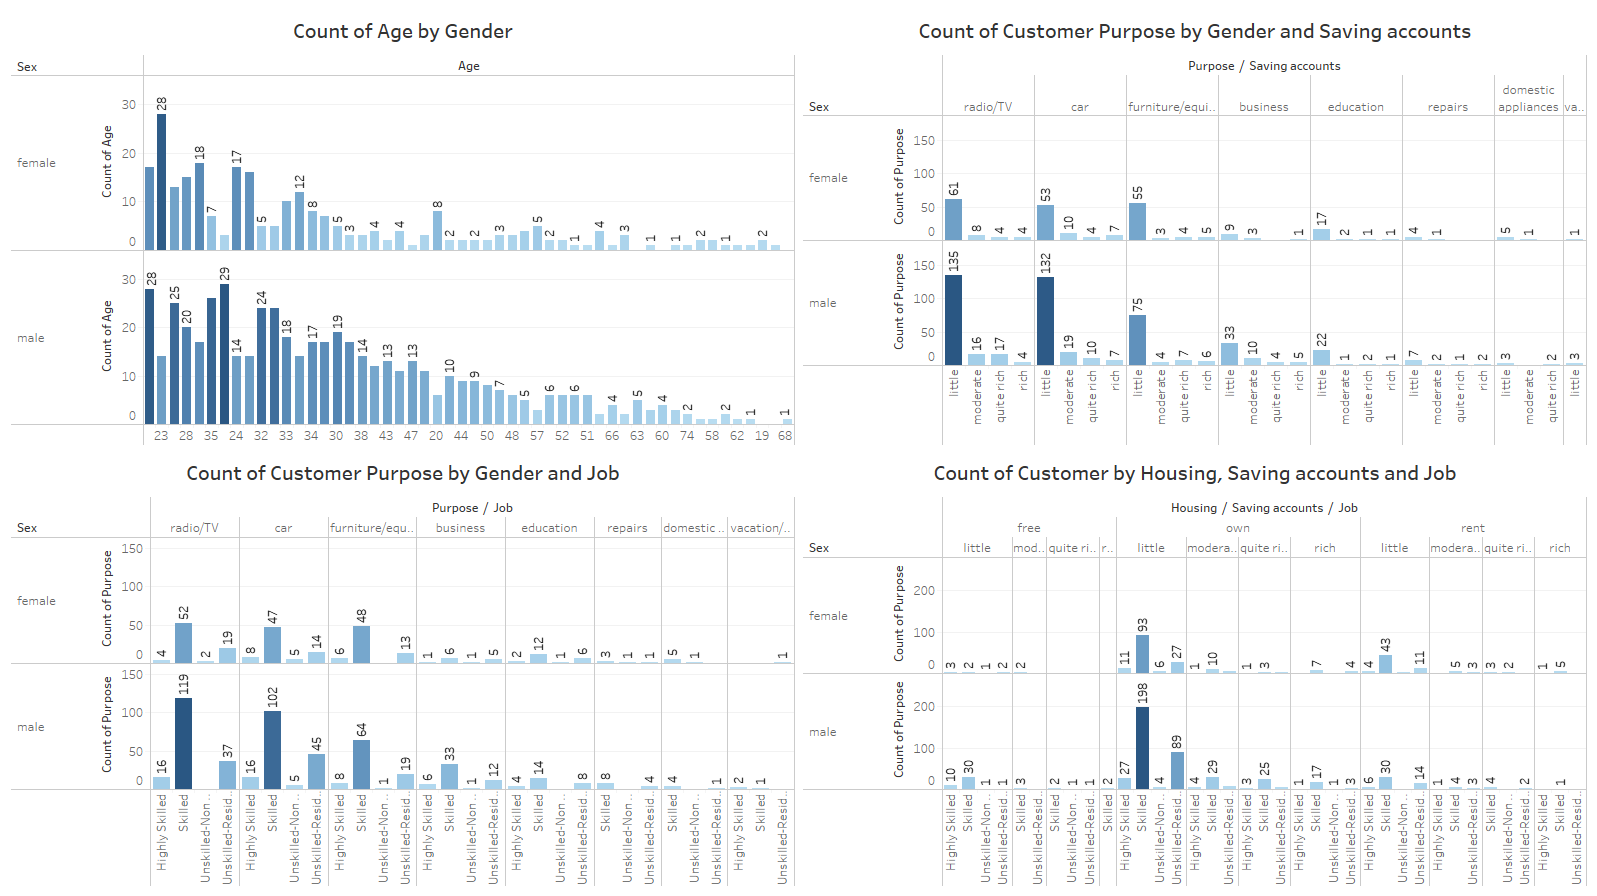

### Insight

Same insight compared to DataOri :

1. The most of chosen customer for every purpose has little Saving accounts status, either they are Male or Female
2. The least of chosen customer for every purpose has rich Saving accounts status, either they are Male or Female
3. The most of chosen customer for every purpose has Skilled Job status, either they are Male or Female
4. The least of chosen customer for every purpose has Unskilled - Non Resident Job status, either they are Male or Female
5. The most of chosen customer who propose credit loan has Skilled Job status, Little Saving accounts status, and Own a house

Difference insight compared to DataOri  : 
1. Most of Male Chosen Customer is 36 and 26 years old with 29 people in total who are 36 years old and 28 people in total who are 26 years old and most of Female Chosen Customer is 23 years old with 28 people in total.
2. The most purpose of customer in Chosen Customer is radio/TV

## Credit Analysis Visualization Dashboard of Worst Customer

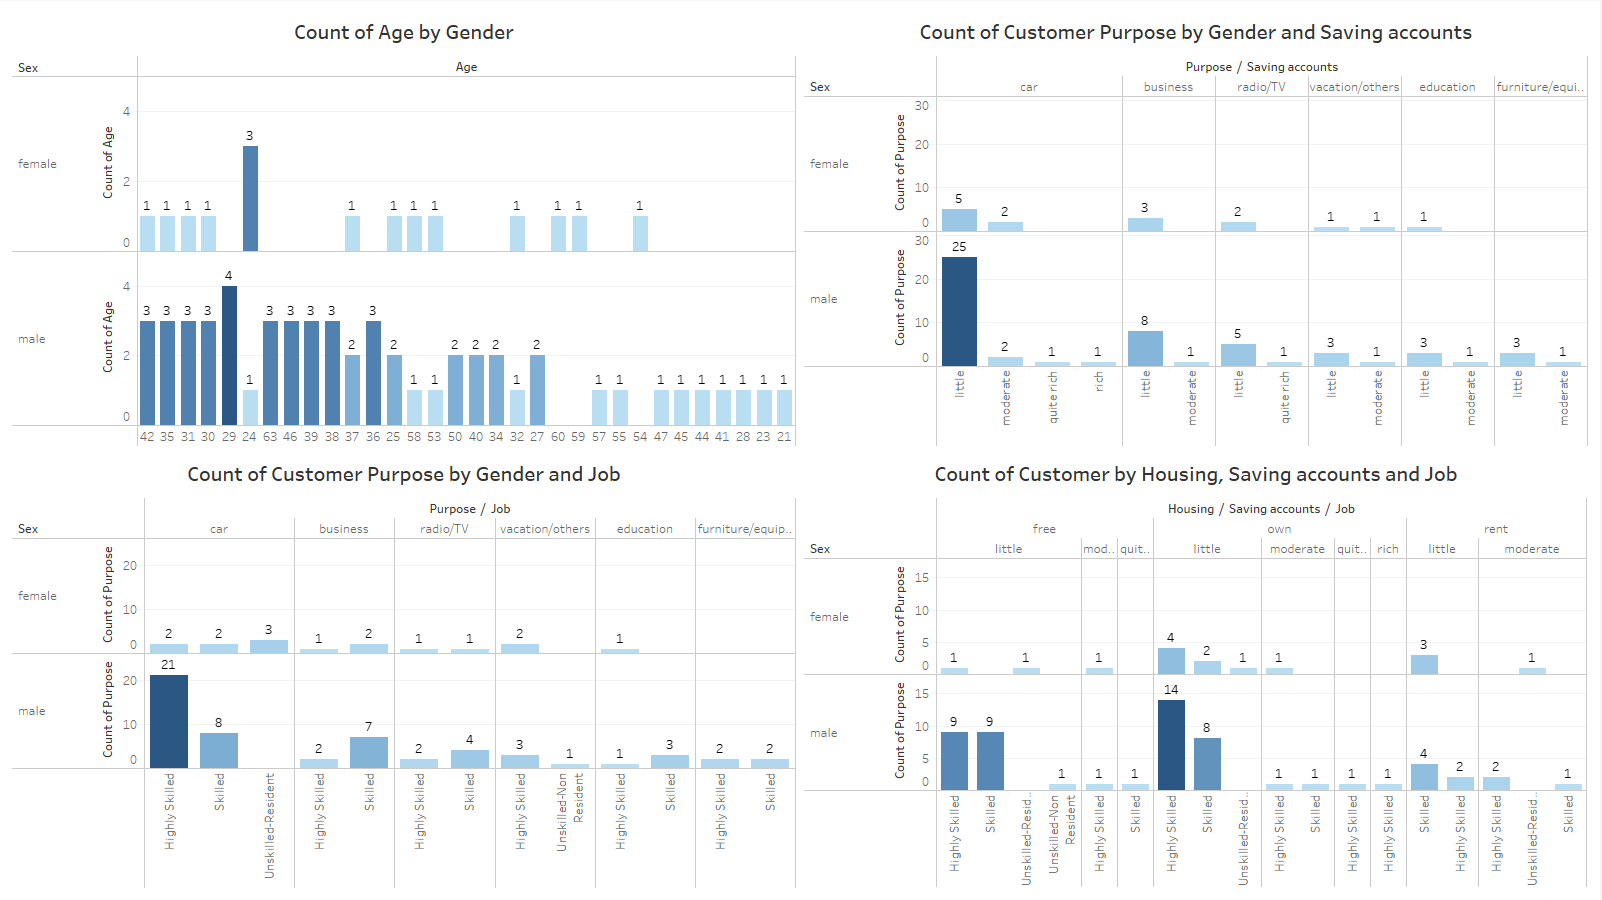

### Insight

Same insight compared to DataOri :

1. The most of worst customer for every purpose has little Saving accounts status, either they are Male or Female
2. The least of worst customer for every purpose has rich Saving accounts status, either they are Male or Female
3. The most purpose of customer in worst customer is Car


Difference insight compared to DataOri  :

1. Most of Male Worst Customer is 29 years old with 4 people in total and most of Female Worst Customer is 24 years old with 3 people in total.
2. The most of worst customer for every purpose has Highly Skilled Job status, either they are Male or Female
3. The least of worst customer for every purpose has Unskilled - Resident Job status for Male and has Unskilled-Non Resident status for Female
4. The most of worst customer who propose credit loan has Highly Skilled Job status, Little Saving accounts status, and Own a house